# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [3]:
import pandas as pd
df = pd.read_csv("housing.data",
                header = None,
                # Separaciones por espacios
                sep = "\s+",
                names = ["CRIM" , "ZN", "INDUS" , "CHAS" , "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

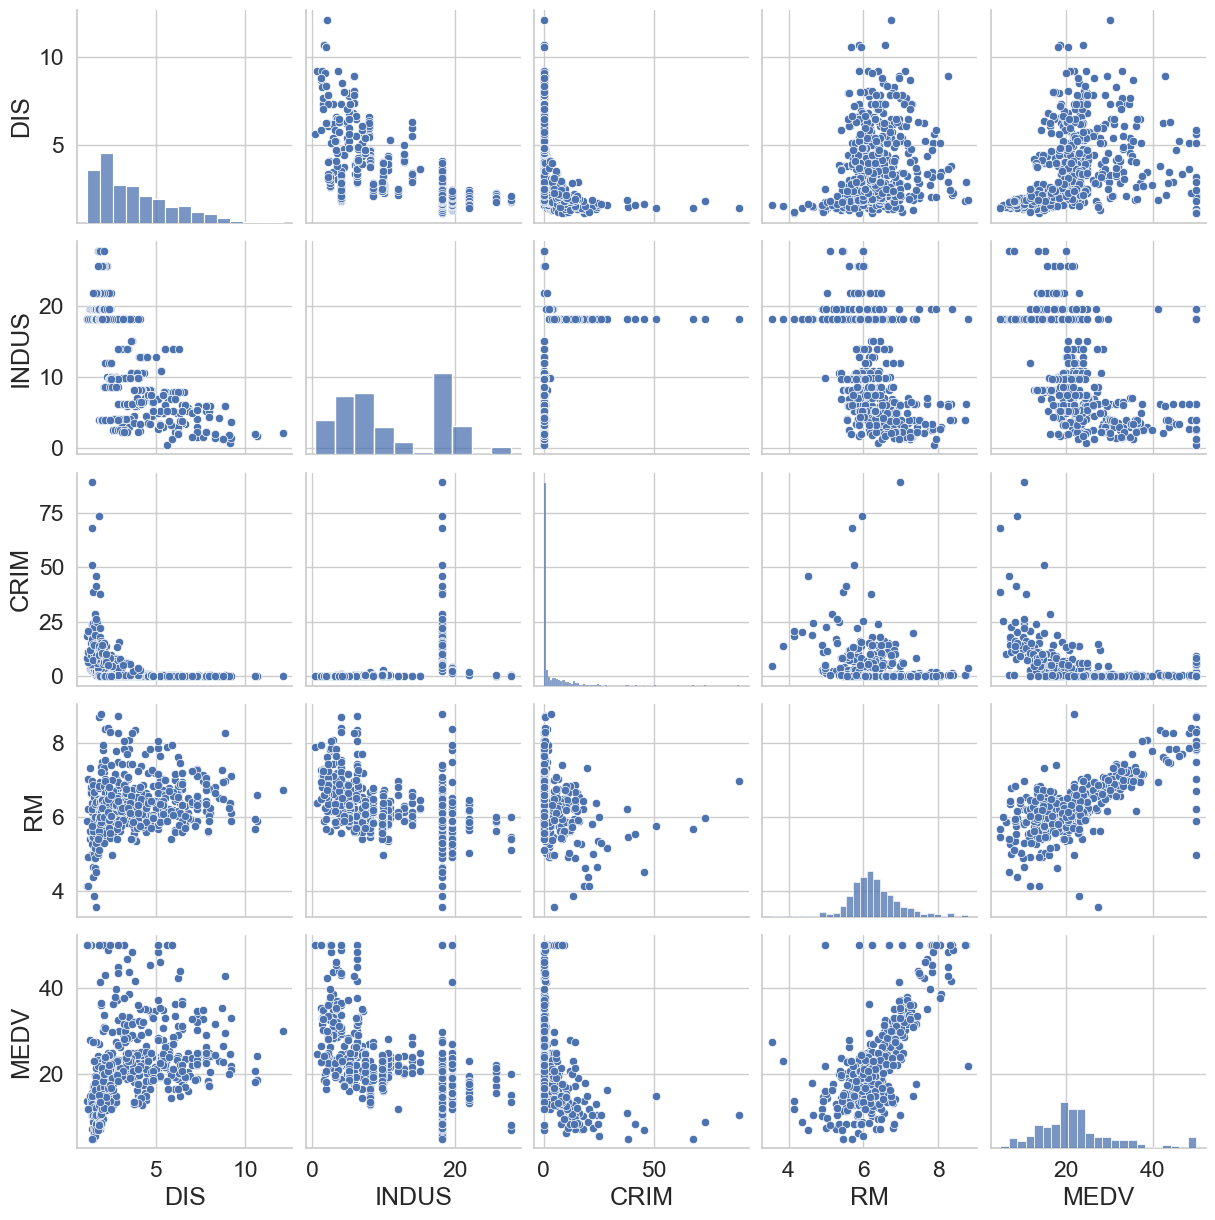

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar los estilos generales de los gráficos
sns.set(style = "whitegrid", context = "notebook", font_scale = 1.5)
# Variables a las que se les hará el análisis
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
sns.pairplot(df[cols], height = 2.5)
plt.show()


Queremos predecir la mediana del costo de la vivienda **MEDV** y vemos en el gráfico que esta parece tener una relación lineal positiva con el número de habitaciones **RM**.

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

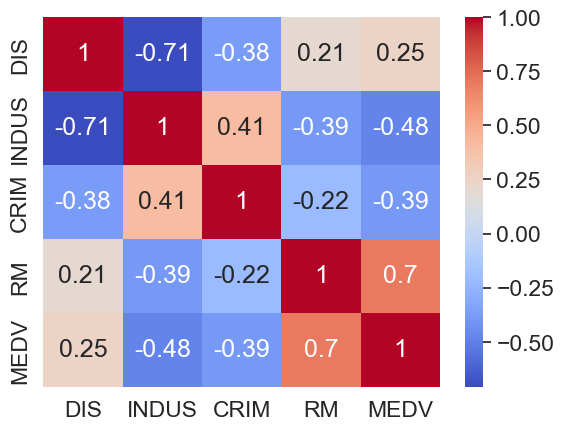

In [7]:
sns.heatmap(df[cols].corr(), annot = True, yticklabels = cols, xticklabels = cols, cmap = "coolwarm")
plt.show()

Vemos que claramente hay una correlación entre **MEDV** y **RM**.

## Creando modelo con scikit-learn

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Definimos la(s) variable(s) X con la que queremos predecir la variable Y; utilizamos reshape para convertirlos en arreglos de
#  dos dimensiones
X = df["RM"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

# Estandarizamos las variables para poder ajustar el modelo
scX = StandardScaler()
scY = StandardScaler()

# Se ajustan los datos
Xstd = scX.fit_transform(X)
ystd= scY.fit_transform(y)

# Se crea el modelo de regresión lineal
slr = LinearRegression()
# Crear la línea recta que mejor se ajusta a los datos
slr.fit(Xstd, ystd)

LinearRegression()

## Análisis de resultados

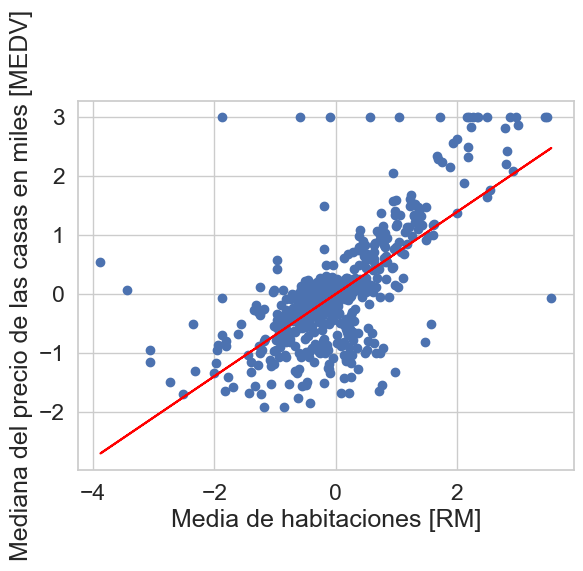

In [15]:
plt.scatter(x = Xstd, y = ystd)
# Utilizar los valores de X para hacer las predicciones
plt.plot(Xstd, slr.predict(Xstd), color = "red")
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Media de habitaciones [RM]")
plt.show()

## Generando predicción con el modelo

In [19]:
import numpy as np
# Supongamos que queremos saber el MEDV de una casa que tiene 5 habitaciones
nHabitaciones = 5
# Estandarizamos
nHabitacionesStd = scX.transform(np.array([nHabitaciones]).reshape(-1, 1))
# Creamos la predicción
slr.predict(nHabitacionesStd)
# La predicción nos devuelve un valor estandarizado así que debemos hacer el proceso inverso
precio = float(scY.inverse_transform(slr.predict(nHabitacionesStd))) * 1000
print(f"El precio estimado de una casa de {nHabitaciones} habitaciones en Boston es de ${precio}")

El precio estimado de una casa de 5 habitaciones en Boston es de $10839.924129462983
